In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#Loading dataset
dfsal = pd.read_csv("Salary.csv")

In [4]:
dfsal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Feature Selection

In [5]:
dfsal.drop("Position",axis=1)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [6]:
dfsal.drop("Position",axis=1,inplace=True)

In [7]:
dfsal

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


### NANs

In [8]:
dfsal.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [9]:
dfsal.isna().sum()

Level     0
Salary    0
dtype: int64

### Error Detection

<Axes: >

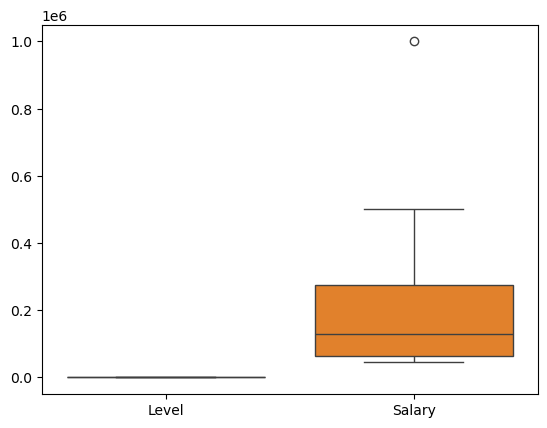

In [10]:
sns.boxplot(dfsal)

In [11]:
#here more salary cannot be an outlier.so we ignore it

### Data Seperation

In [12]:
X = dfsal[["Level"]]

In [13]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [14]:
y = dfsal["Salary"]

In [15]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

### Model Building

In [40]:
lr_model = LinearRegression()

In [41]:
lr_model

LinearRegression()

### Model Training

In [42]:
lr_model.fit(X,y)

LinearRegression()

### Model Testing

In [43]:
lr_model.score(X,y)

0.6690412331929895

### Visualisation

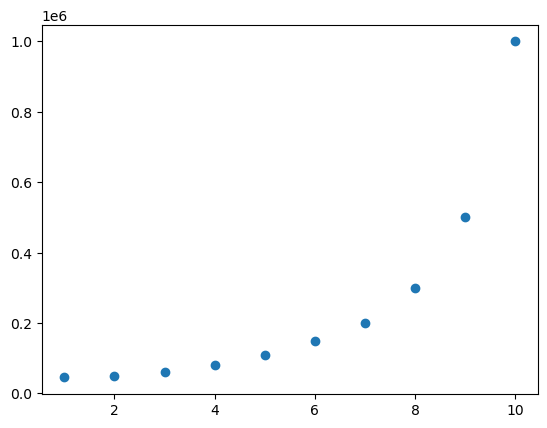

In [44]:
plt.scatter(X,y)

In [45]:
y_pred = lr_model.predict(X)

In [46]:
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [47]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

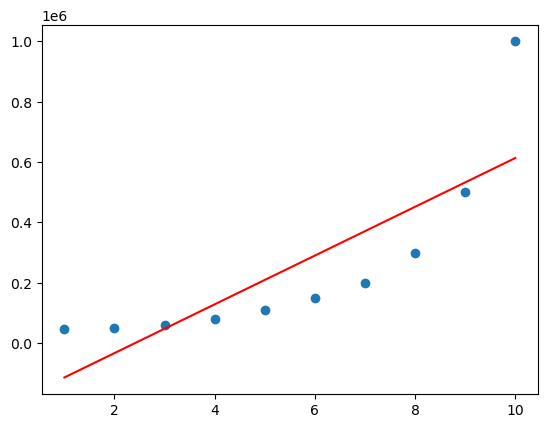

In [48]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")
plt.show()

### Polynomial Regression

In [49]:
poly =PolynomialFeatures()

In [50]:
poly

PolynomialFeatures()

In [51]:
poly.fit(X)

PolynomialFeatures()

In [53]:
X_poly = poly.transform(X)

In [54]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [55]:
lr1 = LinearRegression()

In [56]:
lr1

LinearRegression()

In [59]:
lr1.fit(X_poly,y)

LinearRegression()

In [60]:
y_pred1 = lr1.predict(X_poly)

In [61]:
y_pred1

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

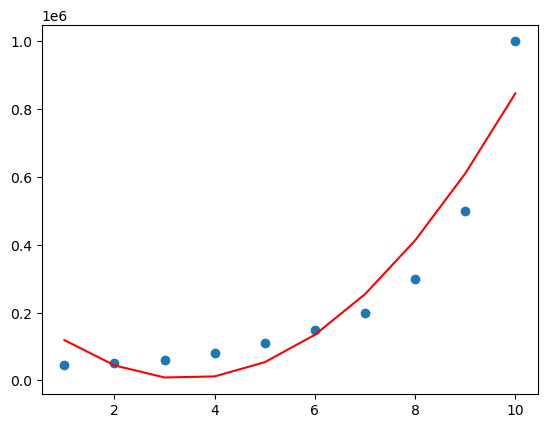

In [62]:
plt.scatter(X,y)
plt.plot(X,y_pred1,color="red")
plt.show()

### Polynomial regression with degree 3

In [63]:
poly3 = PolynomialFeatures(degree=3)

In [64]:
poly3

PolynomialFeatures(degree=3)

In [65]:
poly3.fit(X)

PolynomialFeatures(degree=3)

In [66]:
X_poly2 = poly3.transform(X)

In [67]:
X_poly2

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [68]:
lr2 = LinearRegression()

In [69]:
lr2

LinearRegression()

In [70]:
lr2.fit(X_poly2,y)

LinearRegression()

In [71]:
lr2.score(X_poly2,y)

0.9812097727913367

In [72]:
y_pred2 = lr2.predict(X_poly2)

In [73]:
y_pred2

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

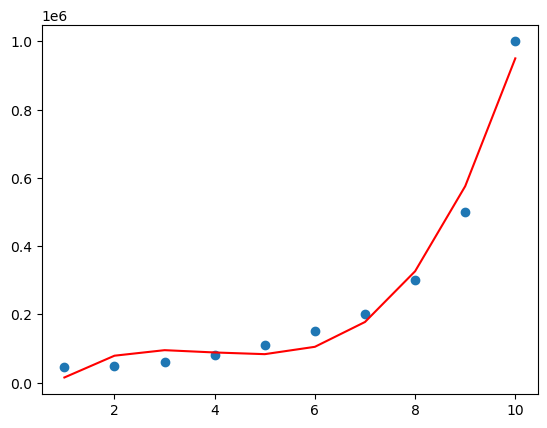

In [76]:
plt.scatter(X,y)
plt.plot(X,y_pred2,color="red")
plt.show()